# Concept Figure

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cosmoDA.cosmoDA as go

import rpy2
from rpy2.robjects.packages import importr
from rpy2.robjects import numpy2ri
import rpy2.robjects as ro
rpy2.robjects.numpy2ri.activate()
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
rpy2_logger.setLevel(logging.ERROR)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
np.set_printoptions(edgeitems=10,linewidth=180)

genscore = importr("genscore")

[11.60463829 -0.013884    2.78326538  3.00300009  3.22298024]


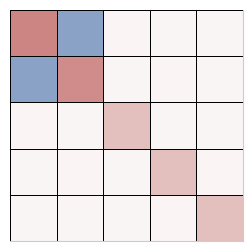

In [2]:
n = 10
p = 5

eta_0 = np.array([0.4, 0.4, 0.05, 0.3, 0.5])*12
eta_c = np.array([-8, 0, 0, 0, 0])
K = np.array([[6, -5.8, 0, -0.1, -0.1], [-5.8, 5.6, -0.1, 0, -0.1], [0, -0.1, 3, -0.2, -0.1], [-0.1, 0, -0.2, 3, 0], [-0.1, -0.1, -0.1, 0, 3]])*1
print(np.linalg.eigvals(K))

fig, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(K, center=0, cmap="vlag", vmin=-10, vmax=10, linewidths=0.7, linecolor='black', ax=ax, cbar=False)
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(True)

save_dir = "."
plt.savefig(f"{save_dir}/concept_K.svg", bbox_inches='tight', format='svg')
plt.savefig(f"{save_dir}/concept_K.png", bbox_inches='tight', format='png', dpi=300)
plt.show()


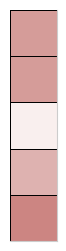

In [3]:
fig, ax = plt.subplots(figsize=(0.6, 3))
sns.heatmap(eta_0.reshape((p, 1)), center=0, cmap="vlag", vmin=-10, vmax=10, linewidths=0.7, linecolor='black', ax=ax, cbar=False)
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(True)

save_dir = "."
plt.savefig(f"{save_dir}/concept_eta_0.svg", bbox_inches='tight', format='svg')
plt.savefig(f"{save_dir}/concept_eta_0.png", bbox_inches='tight', format='png', dpi=300)

plt.show()

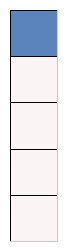

In [4]:
fig, ax = plt.subplots(figsize=(0.6, 3))
sns.heatmap(eta_c.reshape((p, 1)), center=0, cmap="vlag", vmin=-10, vmax=10, linewidths=0.7, linecolor='black', ax=ax, cbar=False)
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(True)

save_dir = "."
plt.savefig(f"{save_dir}/concept_eta_c.svg", bbox_inches='tight', format='svg')
plt.savefig(f"{save_dir}/concept_eta_c.png", bbox_inches='tight', format='png', dpi=300)

plt.show()

In [5]:
domain = genscore.make_domain(type="simplex", p=p)

x_control = genscore.gen(n/2, setting="log_log_sum0", abs=False, eta=eta_0, K=K, domain=domain, finite_infinity=100, seed=1, burn_in=1000, thinning=1000, verbose=False, remove_outofbound=True)
x_case = genscore.gen(n/2, setting="log_log_sum0", abs=False, eta=eta_0 + eta_c, K=K, domain=domain, finite_infinity=100, seed=1, burn_in=1000, thinning=1000, verbose=False, remove_outofbound=True)
x = np.concatenate((x_control, x_case), axis=0)

In [6]:
x

array([[0.21331924, 0.22245602, 0.14668499, 0.16107847, 0.25646127],
       [0.19982297, 0.20604182, 0.1386643 , 0.27119836, 0.18427255],
       [0.12927439, 0.10683064, 0.26694081, 0.29748753, 0.19946662],
       [0.13693437, 0.09619096, 0.1329507 , 0.26657872, 0.36734525],
       [0.14864591, 0.10285253, 0.30926092, 0.17855705, 0.26068358],
       [0.08563745, 0.07585537, 0.24638031, 0.20538597, 0.38674091],
       [0.06326097, 0.09870729, 0.16131964, 0.33579935, 0.34091275],
       [0.04319057, 0.09960769, 0.16540907, 0.3468175 , 0.34497516],
       [0.03188535, 0.03930081, 0.2487521 , 0.28844547, 0.39161627],
       [0.03637819, 0.04045715, 0.17913419, 0.35437548, 0.389655  ]])

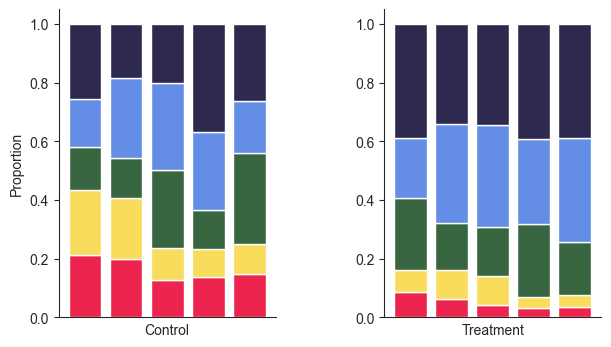

In [7]:
sns.set_style("ticks")
width = 0.8
fig, ax = plt.subplots(1, 2, figsize=(7, 4))
fig.subplots_adjust(wspace=0.5)
bottom = np.zeros(int(n/2))
names = ["a", "b", "c", "d", "e"]
palette=sns.color_palette(["#ed254e","#f9dc5c","#386641","#648de5","#2e294e"])

labels_control = tuple([f"Control {j+1}" for j in range(int(n/2))])
for i in range(p):
    name = names[i]
    ax[0].bar(x=labels_control, height=x_control[:, i].flatten(), width=width, label=name, bottom=bottom, color=palette[i])
    bottom += x_control[:, i]
ax[0].set_xticks([], [])
ax[0].set_ylabel("Proportion")
ax[0].set_xlabel("Control")

bottom = np.zeros(int(n/2))
labels_case = tuple([f"Treatment {j+1}" for j in range(int(n/2))])
for i in range(p):
    name = names[i]
    ax[1].bar(x=labels_case, height=x_case[:, i].flatten(), width=width, label=name, bottom=bottom, color=palette[i])
    bottom += x_case[:, i]
ax[1].set_xticks([], [])
ax[1].set_ylabel("")
ax[1].set_xlabel("Treatment")

sns.despine()
# plt.tight_layout()

save_dir = "."
plt.savefig(f"{save_dir}/concept_bars.svg", bbox_inches='tight', format='svg')
plt.savefig(f"{save_dir}/concept_bars.png", bbox_inches='tight', format='png', dpi=300)

plt.show()

In [9]:
tol = 1e-8

maxit = 1000
nlambda = 200
h_mode = "pow"
h_param1 = 2

lambda1s = np.exp(np.linspace(np.log(1.5), np.log(1e-7), nlambda))
res = go.estimate(x, symmetric="symmetric", cov=np.repeat((0,1), n/2), tol=tol, maxit=maxit, centered=False, scale="", lambda1s=lambda1s, h_param1=h_param1, BIC_refit=True, return_raw=True, return_elts=True, diagonal_multiplier=None, cv_fold=5, cv_fold_seed=42, sum_zero=True, a=0, b=0)
lambda_cv_id, lambda_cv, K_opt, eta_0_opt, eta_c_opt = go.get_K_eta_cv(x, res)
test = go.da_test(res, lambda_cv_id, np.repeat((0,1), n/2))
test

/Users/johannesostner/Documents/PhD/score_matching_CODA/cosmoDA/cosmoDA/cosmoDA.py:865: RuntimeWarning: divide by zero encountered in scalar divide
  if ((lambda1 != 0) & (np.abs(l1 - lambda1) / lambda1 <= tol) &
/Users/johannesostner/Documents/PhD/score_matching_CODA/cosmoDA/cosmoDA/cosmoDA.py:868: RuntimeWarning: invalid value encountered in scalar divide
  ((lambda2 != np.inf) & (l2 != 0) & (np.abs(l2 - lambda2) / lambda2 <= tol)) &
/opt/anaconda3/envs/cosmoDA/lib/python3.11/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


,Parameter,estimate,std,pval,qval
0,eta_0_0,6.115694,2.838878,0.031219,0.052032
1,eta_0_1,5.403219,3.086006,0.079967,0.079967
2,eta_0_2,7.445470,3.748288,0.046993,0.058741
3,eta_0_3,8.177502,2.935765,0.005345,0.016490
4,eta_0_4,9.258143,3.408016,0.006596,0.016490
5,eta_c_0,0.665820,2.838070,0.814517,0.814517
6,eta_c_1,4.368000,4.432794,0.324436,0.405545
7,eta_c_2,21.104009,8.159178,0.009695,0.024237
8,eta_c_3,37.467525,19.681682,0.056953,0.094921
9,eta_c_4,45.775645,17.679853,0.009622,0.024237


/var/folders/sp/vkxzpjtj3ml_0r91ng1z6vx00000gn/T/ipykernel_90076/1861565662.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('tab10')


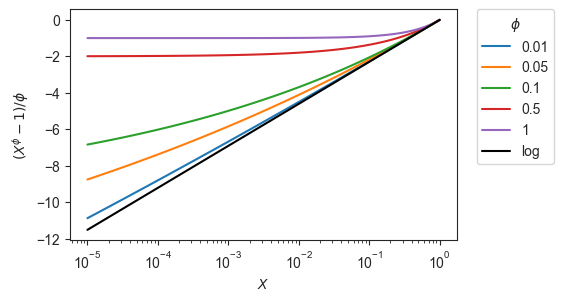

In [10]:
import matplotlib
plt.figure(figsize=(5, 3))
rel_abs = np.logspace(start=-5, stop=0, num=100)
a_s = [0.01, 0.05, 0.1, 0.5, 1]
cmap = matplotlib.cm.get_cmap('tab10')
c = 0
for a in a_s:
    plt.plot(rel_abs, (rel_abs**a-1)/a, label=a, color=cmap(c))
    c += 1
plt.plot(rel_abs, np.log(rel_abs), label="log", color="black")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="$\phi$")
plt.xlabel("$X$")
plt.ylabel("$(X^{\phi} -1)/{\phi}$")

plt.xscale("log")
save_dir = "."
plt.savefig(f"{save_dir}/concept_power.svg", bbox_inches='tight', format='svg')
plt.savefig(f"{save_dir}/concept_power.png", bbox_inches='tight', format='png', dpi=300)

plt.show()

([<matplotlib.patches.Rectangle object at 0x3218f0450>, <matplotlib.patches.Rectangle object at 0x321afb090>, <matplotlib.patches.Rectangle object at 0x17fa5f390>, <matplotlib.patches.Rectangle object at 0x320c9ded0>, <matplotlib.patches.Rectangle object at 0x321aeb650>], ['a', 'b', 'c', 'd', 'e'])


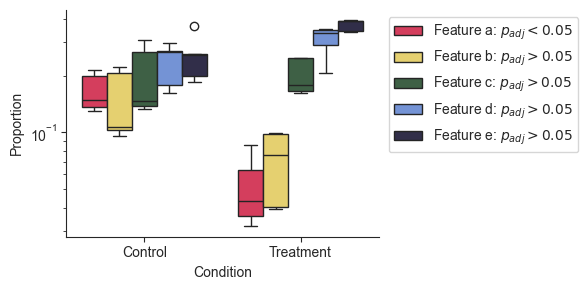

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
data_df = pd.DataFrame(x, columns=names, index=[f"x_{i}" for i in range(n)])
data_df["Treatment"] = np.repeat(("Control", "Treatment"), int(n/2))
data_long = pd.melt(data_df.reset_index(), id_vars=("index", "Treatment"), value_vars=names)
data_long["Feature"] = pd.Categorical(data_long["variable"], categories=names)

sns.boxplot(data=data_long, x="Treatment", y="value", hue="Feature", palette=palette, ax=ax)
ax.set_yscale("log")
ax.set_ylabel("Proportion")
ax.set_xlabel("Condition")
print(ax.get_legend_handles_labels())
ax.legend(bbox_to_anchor=(1.01, 1), loc=2, 
          labels=["Feature a: $p_{adj} < 0.05$", "Feature b: $p_{adj} > 0.05$", "Feature c: $p_{adj} > 0.05$", "Feature d: $p_{adj} > 0.05$", "Feature e: $p_{adj} > 0.05$"],
          handles=ax.get_legend_handles_labels()[0])
sns.despine()
plt.tight_layout()

save_dir = "."
plt.savefig(f"{save_dir}/concept_da.svg", bbox_inches='tight', format='svg')
plt.savefig(f"{save_dir}/concept_da.png", bbox_inches='tight', format='png', dpi=300)
plt.show()